### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

pd.options.plotting.backend = "plotly"
import datetime
import plotly.io as pio

sns.set_theme(style="whitegrid", palette="pastel")

### Importing File

In [2]:
df_activities = pd.read_csv("activities.csv")

In [57]:
df_activities['Distance']

0      10.98
1       3.36
2       1.36
3       6.75
4       9.74
       ...  
736     2.61
737     4.75
738     2.64
739     2.49
740     2.51
Name: Distance, Length: 741, dtype: object

In [3]:
### Speeds are acording to meter per seconds

df = df_activities[
    [
        "Activity ID",
        "Activity Date",
        "Activity Type",
        "Distance",
        "Moving Time",
        "Average Speed",
    ]
]

outdoors = ["Run", "Ride", "Hike"]

df = df[df["Activity Type"].isin(outdoors)]

df["Distance"] = df["Distance"].astype(float)

df["Activity Date"] = pd.to_datetime(df["Activity Date"])
df["Activity Date"] = df["Activity Date"].dt.strftime("%Y-%m-%d")
df["Activity Date"] = pd.to_datetime(df["Activity Date"])

df.set_index("Activity Date", inplace=True)

df.index.freq = pd.infer_freq(df.index)

In [4]:
important_dates_dict = {
    "date": ["2020-02-29", "2020-08-31", "2021-09-30"],
    "event": ["Corona Pandemic", "Change No.1", "Change No.2"],
}

### Moving Time Analysis

#### Monthly

In [5]:
df_moving_time = df["Moving Time"].resample(rule="M").sum()

df_moving_time = df_moving_time / 3600

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df_moving_time.index,
        y=df_moving_time.values,
        name="Moving Time",
        marker=dict(color="#655967"),
    )
)
max_moving_time_date = df_moving_time[
    df_moving_time.values == df_moving_time.values.max()
].index[0]
max_moving_time_value = df_moving_time[
    df_moving_time.values == df_moving_time.values.max()
].values[0]

fig.add_annotation(
    x=max_moving_time_date,
    y=max_moving_time_value,
    text=f"maximum moving time is {round(max_moving_time_value)} hrs",
    showarrow=True,
    bgcolor="#98BF64",
    font=dict(color="white"),
)

lastmonth_moving_time_date = df_moving_time.index[-1]
lastmonth_moving_time_value = df_moving_time.values[-1]


fig.add_annotation(
    x=lastmonth_moving_time_date,
    y=lastmonth_moving_time_value,
    text=f"last month moving time is {round(lastmonth_moving_time_value)} hrs",
    showarrow=True,
    bgcolor="#98BF64",
    font=dict(color="white"),
)

fig.update_layout(
    title="Moving Time per Month (hrs)",
    template="plotly_white",
    legend=dict(),
    xaxis_title="Months",
    yaxis_title="Hours",
)

fig.show()

#### Yearly

In [6]:
df_moving_time = df["Moving Time"].resample(rule="AS").sum()

df_moving_time = df_moving_time / 3600

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_moving_time.index,
        y=df_moving_time.values,
        marker=dict(color="red"),
        text=df_moving_time.values,
        textposition="outside",
        texttemplate="%{text:0.2f}",
        name="Moving Time",
    )
)

fig.update_layout(
    title="Moving Time per Month (hrs)",
    template="plotly_dark",
    legend=dict(),
    height=500,
)

fig.show()

### Runs Analysis

In [7]:
df_runs = df[df["Activity Type"] == "Run"]
df_runs["pace"] = (df_runs["Moving Time"] / 60) / df_runs["Distance"]
df_runs["speed"] = df_runs["Distance"] / (df_runs["Moving Time"] / 3600)

/tmp/ipykernel_148791/1166598296.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_148791/1166598296.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### # of Runs

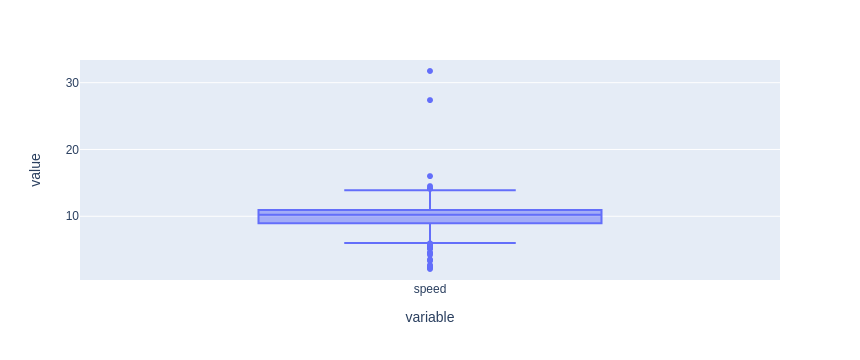

In [15]:
px.box(df_runs['speed'])

In [8]:
df_runs_counts_monthly = df_runs["Activity ID"].resample(rule="M").count()
df_runs_distance_monthly = df_runs["Distance"].resample(rule="M").sum()
df_runs_speed_monthly = df_runs["speed"].resample(rule="M").median()
size = df_runs_distance_monthly.values

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df_runs_counts_monthly.index,
        y=df_runs_counts_monthly.values,
        mode="markers",
        marker=dict(
            size=size,
            color=df_runs_speed_monthly.values,
            sizemode="area",
            showscale=True,
            colorbar=dict(title="Speed"),
            colorscale="speed",
        ),
        name="# of Runs per Month",
    )
)
fig.add_vline(
    x="2018-09-15", line_dash="dash", line_color="green", name="Start Running"
)
fig.add_annotation(
    x="2018-09-15",
    y=25,
    text="Start Running",
    showarrow=False,
    bgcolor="#98BF64",
    font=dict(color="white"),
)


fig.add_vline(
    x="2020-02-15", line_dash="dash", line_color="red", name="Corona Catastrophie"
)
fig.add_annotation(
    x="2020-02-29",
    y=22,
    text="Corona Catastrophie",
    showarrow=False,
    bgcolor="#655967",
    font=dict(color="white"),
)

fig.add_vline(
    x="2020-08-15",
    line_dash="dash",
    line_color="orange",
    name="My personal life 1st big issue",
)
fig.add_annotation(
    x="2020-08-31",
    y=25,
    text="My personal life 1st big issue",
    showarrow=False,
    bgcolor="#655967",
    font=dict(color="white"),
)
fig.add_vline(
    x="2021-09-15",
    line_dash="dash",
    line_color="yellow",
    name="My personal life 2nd big issue",
)
fig.add_annotation(
    x="2021-09-30",
    y=22,
    text="My personal life 2nd big issue",
    showarrow=False,
    bgcolor="#655967",
    font=dict(color="white"),
)

fig.update_layout(
    title="Monthly Runs",
    template="plotly_white",
    legend=dict(),
    xaxis_title="Months",
    yaxis_title="# of Runs",
)

fig.show()

In [9]:
df_runs_counts_monthly = df_runs["Activity ID"].resample(rule="M").count()
df_runs_distance_monthly = df_runs["Distance"].resample(rule="M").sum()


from plotly.subplots import make_subplots

fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(
        x=df_runs_counts_monthly.index,
        y=df_runs_counts_monthly.values,
        name="# of Runs per Month",
    ),
    secondary_y=False,
)
fig.add_trace(
    go.Bar(
        x=df_runs_distance_monthly.index,
        y=df_runs_distance_monthly.values,
        name="Sum of Distance per Month (km)",
        opacity=0.5,
    ),
    secondary_y=True,
)

fig.add_annotation(
    x="2020-02-29",
    y=10,
    text="Corona Catastrophie",
    showarrow=True,
)

fig.add_annotation(
    x="2020-08-31",
    y=4,
    text="joining Kayson and Nada's prison started",
    showarrow=True,
)

fig.add_annotation(
    x="2021-09-30",
    y=12,
    text="Joining SnappTrip and Nada was hospitalized",
    showarrow=True,
)

fig.update_layout(
    title="Runs per Month with Distance", template="plotly_dark", legend=dict()
)

fig.show()

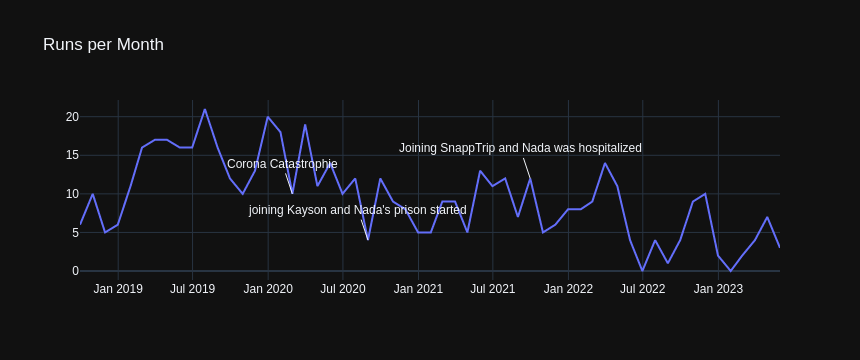

In [173]:
fig= go.Figure()
fig.add_trace(go.Scatter(
    x= df_runs_counts_monthly.index,
    y= df_runs_counts_monthly.values,
    name= '# of Runs per Month'
    ))

fig.add_annotation(
        x= '2020-02-29',
        y= 10,
        text= "Corona Catastrophie",
        showarrow= True,
    )

fig.add_annotation(
        x= '2020-08-31',
        y= 4,
        text= "joining Kayson and Nada's prison started",
        showarrow= True,
    )

fig.add_annotation(
        x= '2021-09-30',
        y= 12,
        text= "Joining SnappTrip and Nada was hospitalized",
        showarrow= True,
    )

fig.update_layout(title= 'Runs per Month', template= 'plotly_dark',
                  legend= dict())

fig.show()

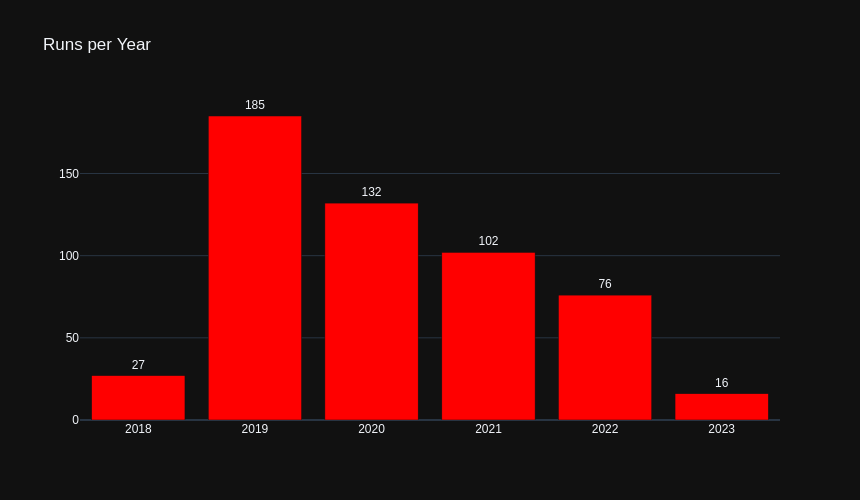

In [229]:
df_runs_counts_yearly= df_runs['Activity ID'].resample(rule= 'AS').count()

fig= go.Figure()
fig.add_trace(go.Bar(
    x= df_runs_counts_yearly.index,
    y= df_runs_counts_yearly.values,
    marker= dict(color= 'red'),
    text= df_runs_counts_yearly.values,
    textposition= 'outside'
    ))

fig.update_layout(title= 'Runs per Year', template= 'plotly_dark',
                  legend= dict(), height= 500)

fig.show()

#### Distance and Pace

##### Pace

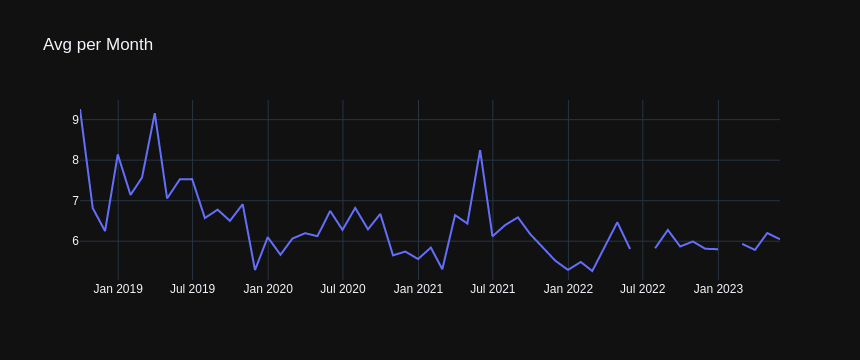

In [216]:
df_runs_avg_pace_monthly= df_runs['pace'].resample(rule= 'M').mean()

fig= go.Figure()

fig.add_trace(go.Scatter(
    x= df_runs_avg_pace_monthly.index,
    y= df_runs_avg_pace_monthly.values,
    name= '# Avg Pace per Month'
    ))

fig.update_layout(title= 'Avg Pace per Month', template= 'plotly_dark',
                  legend= dict())

fig.show()

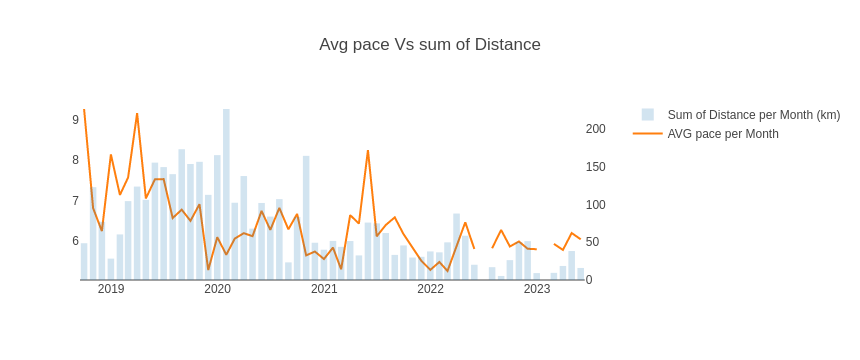

In [271]:
from plotly.subplots import make_subplots
fig= make_subplots(specs= [[{'secondary_y' : True}]])
fig.add_trace(go.Bar(
    x= df_runs_distance_monthly.index,
    y= df_runs_distance_monthly.values,
    name= 'Sum of Distance per Month (km)',
    opacity= 0.2
    ), secondary_y= True)
fig.add_trace(go.Scatter(
    x= df_runs_avg_pace_monthly.index,
    y= df_runs_avg_pace_monthly.values,
    name= 'AVG pace per Month', 
    ), secondary_y= False)

fig.update_layout(title= 'Avg pace Vs sum of Distance', template= 'ygridoff',
                  legend= dict())

fig.show()

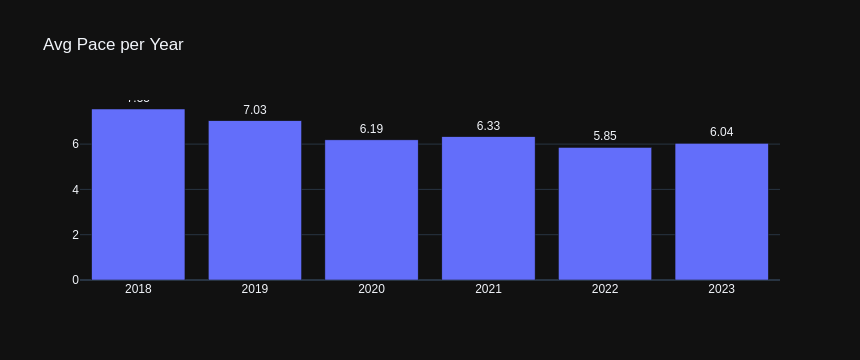

In [277]:
df_runs_avg_pace_yearly= df_runs['pace'].resample(rule= 'AS').mean()

fig= go.Figure()

fig.add_trace(go.Bar(
    x= df_runs_avg_pace_yearly.index,
    y= df_runs_avg_pace_yearly.values,
    text= df_runs_avg_pace_yearly.values,
    textposition= 'outside',
    texttemplate= '%{text:0.2f}',
    name= '# Avg Pace per Year'
    ))

fig.update_layout(title= 'Avg Pace per Year', template= 'plotly_dark',
                  legend= dict())

fig.show()

##### Distance

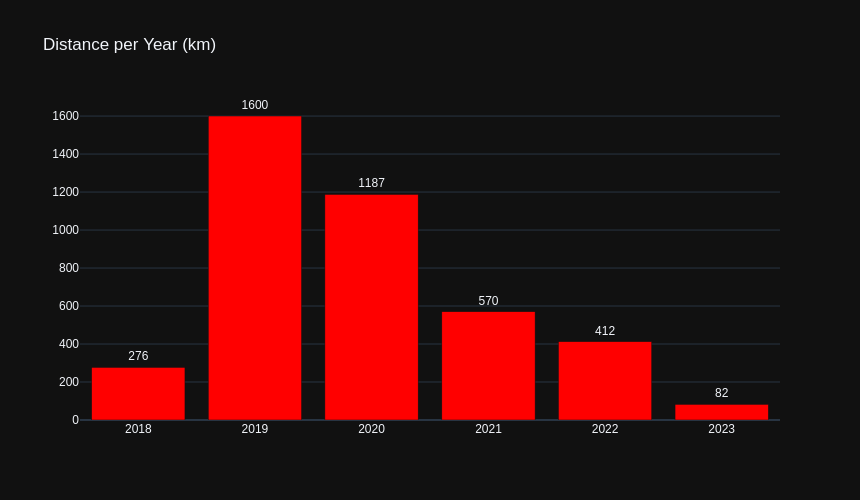

In [201]:
df_runs_distance_yearly= df_runs['Distance'].resample(rule= 'AS').sum()

fig= go.Figure()
fig.add_trace(go.Bar(
    x= df_runs_distance_yearly.index,
    y= df_runs_distance_yearly.values,
    marker= dict(color= 'red'),
    text= df_runs_distance_yearly.values.astype(int),
    textposition= 'outside'
    ))

fig.update_layout(title= 'Distance per Year (km)', template= 'plotly_dark',
                  legend= dict(), height= 500)

fig.show()

#### Distance Per Run

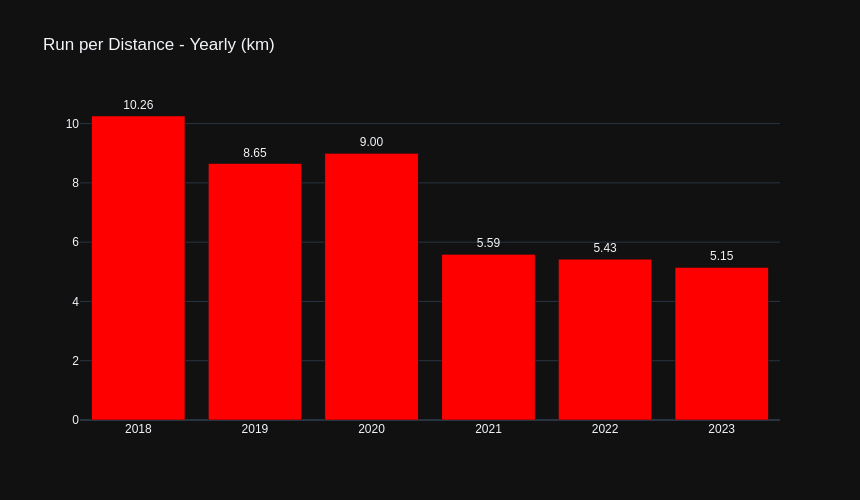

In [263]:
distance_per_run_yearly= df_runs_distance_yearly/df_runs_counts_yearly
fig= go.Figure()
fig.add_trace(go.Bar(
    x= distance_per_run_yearly.index,
    y= distance_per_run_yearly.values,
    marker= dict(color= 'red'),
    text= distance_per_run_yearly.values,
    textposition= 'outside',
    texttemplate='%{text:.2f}'
    ))

fig.update_layout(title= 'Run per Distance - Yearly (km)', template= 'plotly_dark',
                  legend= dict(), height= 500)

fig.show()